In [91]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('autos_dataset.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [93]:
df.replace({"?":np.nan},inplace = True)

In [94]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['normalized-losses'] 

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [95]:
df['fuel-type'].replace({'gas':1, 'diesel':0},inplace = True)

In [96]:
df['aspiration'].replace({'std': 0, 'turbo': 1},inplace = True)

In [97]:
df['num-of-doors'].replace({'four': 4, 'two': 2},inplace = True)

In [98]:
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [100]:
df['bore'].fillna(df['bore'].median(),inplace = True)
df['stroke'].fillna(df['stroke'].median(),inplace = True)
df['horsepower'].fillna(df['horsepower'].median(),inplace = True)
df['price'].fillna(df['price'].median(),inplace = True)
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace = True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace = True)


In [101]:
df_fuel_system = pd.get_dummies(df['fuel-system'],prefix='fuel')
df_fuel_system

,fuel_1bbl,fuel_2bbl,fuel_4bbl,fuel_idi,fuel_mfi,fuel_mpfi,fuel_spdi,fuel_spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0
201,0,0,0,0,0,1,0,0
202,0,0,0,0,0,1,0,0
203,0,0,0,1,0,0,0,0


In [102]:
df['num-of-cylinders'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 
                                'two': 2, 'three': 3, 'twelve': 12},inplace = True)

In [103]:
feature_list = ['make','normalized-losses','body-style','drive-wheels','engine-location',
                'engine-type','fuel-system']
df.drop(feature_list,axis = 1,inplace = True)

In [104]:
df = pd.concat([df,df_fuel_system],axis= 1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   fuel-type          205 non-null    int64  
 2   aspiration         205 non-null    int64  
 3   num-of-doors       205 non-null    float64
 4   wheel-base         205 non-null    float64
 5   length             205 non-null    float64
 6   width              205 non-null    float64
 7   height             205 non-null    float64
 8   curb-weight        205 non-null    int64  
 9   num-of-cylinders   205 non-null    int64  
 10  engine-size        205 non-null    int64  
 11  bore               205 non-null    float64
 12  stroke             205 non-null    float64
 13  compression-ratio  205 non-null    float64
 14  horsepower         205 non-null    float64
 15  peak-rpm           205 non-null    float64
 16  city-mpg           205 non

## Train Test Split

In [106]:
x = df.drop('price',axis = 1)
y = df['price']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [108]:
x_test.shape

(41, 26)

## Model Training

In [109]:
dt_model = DecisionTreeRegressor(criterion='squared_error')
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [110]:
y_pred_train = dt_model.predict(x_train)
y_pred_train[5:10]

array([33900.,  9895., 37028.,  8921., 15645.])

In [111]:
y_train[5:10]

47     32250.0
131     9895.0
128    37028.0
28      8921.0
58     15645.0
Name: price, dtype: float64

In [112]:
y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-sqaured value is :",r2_value)

Mean Squared Error : 94659.7987804878
Root Mean Squared Error : 307.6683259298685
Mean Absolute Error : 86.41463414634147
R-sqaured value is : 0.9982923501294493


In [113]:
y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-sqaured value is :",r2_value)

Mean Squared Error : 16191510.5
Root Mean Squared Error : 4023.86760468085
Mean Absolute Error : 2491.390243902439
R-sqaured value is : 0.8126621721215948


# Hyperparamter Tuning

In [114]:
hyperparameters = {
    'criterion' : ['mse','mae'],
    "max_depth" : np.arange(3,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,15)
}

In [117]:
# dt_reg = DecisionTreeRegressor()
# # dt_model.fit(x_train, y_train)
# gscv_dt_reg = GridSearchCV(dt_reg, hyperparameters, cv = 5)
# gscv_dt_reg.fit(x_train, y_train)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create the DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

# Define the hyperparameters and their potential values
hyperparameters = {
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
    'max_depth': [None, 10, 20, 30],  # You can adjust the values as needed
    # Add other hyperparameters here
}

# Create GridSearchCV instance
gscv_dt_reg = GridSearchCV(dt_reg, hyperparameters, cv=5)

# Fit the GridSearchCV
gscv_dt_reg.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error', 'poisson'],
                         'max_depth': [None, 10, 20, 30]})

In [118]:
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=30)

In [119]:
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=9, min_samples_leaf=6,
                      min_samples_split=10)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=10)

In [120]:
# Train Data Evaluation

y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-sqaured value is :",r2_value)

Mean Squared Error : 5217270.104942501
Root Mean Squared Error : 2284.1344323271564
Mean Absolute Error : 1295.8785595502059
R-sqaured value is : 0.9058811582729693


In [121]:
y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-sqaured value is :",r2_value)


# 17450 +- 2511
# 450 +- 50

Mean Squared Error : 11973412.495491682
Root Mean Squared Error : 3460.2619114008817
Mean Absolute Error : 2315.7414141414147
R-sqaured value is : 0.8614661004482833


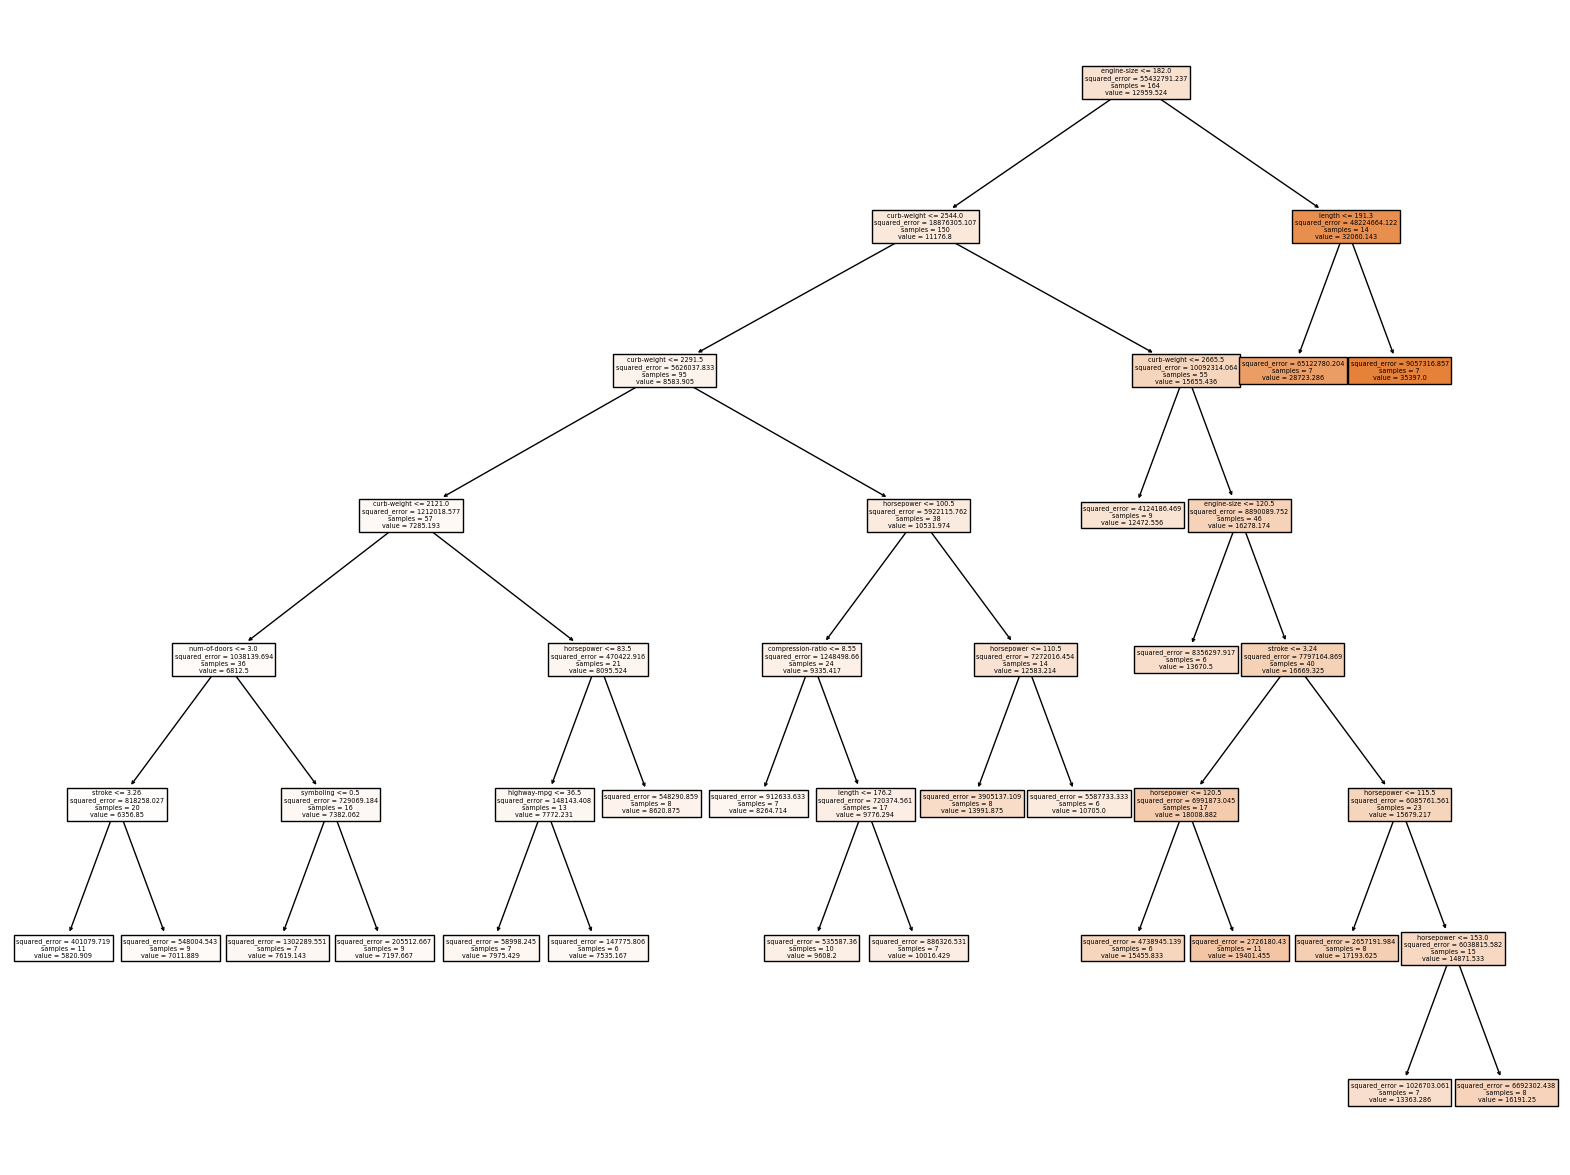

In [126]:
# plt.figure(figsize=(200,150))
# tree = plot_tree(dt_model, feature_names = x.columns, filled = True)
# plt.savefig('DT_reg.png')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
tree = plot_tree(dt_model, feature_names=x.columns.tolist(), filled=True)
plt.savefig('DT_reg.png')


# Pruning

In [123]:
dt_model.cost_complexity_pruning_path(x_train, y_train)

{'ccp_alphas': array([0.00000000e+00, 3.81842537e+03, 4.18419643e+03, 4.26503708e+03,
        2.17481101e+04, 4.28124558e+04, 5.69680580e+04, 6.90802736e+04,
        1.33128955e+05, 1.76797680e+05, 2.25858131e+05, 3.26040995e+05,
        5.68708541e+05, 6.64728455e+05, 9.50515965e+05, 1.46553742e+06,
        1.06213104e+07, 3.40511384e+07]),
 'impurities': array([ 5217270.10494251,  5221088.53030881,  5225272.7267425 ,
         5229537.76381785,  5251285.87391177,  5294098.32971677,
         5351066.38771982,  5420146.66135001,  5553275.61646646,
         5906870.97689007,  6132729.10787875,  7110852.09345829,
         7679560.63481932,  8344289.0902849 ,  9294805.05544167,
        10760342.4718837 , 21381652.82752614, 55432791.23720997])}

In [124]:
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=9, min_samples_leaf=6,
                      min_samples_split=10)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, min_samples_split=10)